In [176]:
# -------------------------------------------- #
# A - Data load
# -------------------------------------------- #

import unicodecsv
import pandas as pd
from IPython.display import display, HTML
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# function read csv
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

#load CSV as list
filename = 'avocado.csv'
alist = read_csv(filename)

len(alist)

18249

In [177]:
df = pd.DataFrame(alist)
df.head()

,AveragePrice,Date,Large Bags,Large Hass,Region,Small Bags,Small Hass,Total Bags,Total Volume,Type,XL Hass,XLarge Bags,Year
0,1.33,27/12/2015,93.25,54454.85,Albany,8603.62,1036.74,8696.87,64236.62,conventional,48.16,0,2015
1,1.35,20/12/2015,97.49,44638.81,Albany,9408.07,674.28,9505.56,54876.98,conventional,58.33,0,2015
2,0.93,13/12/2015,103.14,109149.67,Albany,8042.21,794.7,8145.35,118220.22,conventional,130.5,0,2015
3,1.08,6/12/2015,133.76,71976.41,Albany,5677.4,1132,5811.16,78992.15,conventional,72.58,0,2015
4,1.28,29/11/2015,197.69,43838.39,Albany,5986.26,941.48,6183.95,51039.6,conventional,75.78,0,2015


In [178]:
def typeDf(df,to_be_parse):
    for col in to_be_parse:
        if col['type'] == 'int':
            #print(col['attribute'])
            df[col['attribute']] = df[col['attribute']].astype(int)
        elif col['type'] == 'float':
            #print(col['attribute'])
            df[col['attribute']] = df[col['attribute']].astype(float)
        elif col['type'] == 'date':
            df[col['attribute']] = pd.to_datetime(df[col['attribute']], format=col['format'], utc=True)

# Change date format as needed
to_be_parse = [
    {'attribute': "Date", 'type': 'date', 'format': '%d/%m/%Y'},
    {'attribute': "Year", 'type': 'int'},
    {'attribute': "Large Bags", 'type': 'float'},
    {'attribute': "Large Hass", 'type': 'float'},
    {'attribute': "Small Bags", 'type': 'float'},
    {'attribute': "Total Bags", 'type': 'float'},
    {'attribute': "Total Volume", 'type': 'float'},
    {'attribute': "XL Hass", 'type': 'float'},
    {'attribute': "XLarge Bags", 'type': 'float'},
    {'attribute': "Small Hass", 'type': 'float'},
    {'attribute': "Total Volume", 'type': 'float'},
    {'attribute': "AveragePrice", 'type': 'float'}
]

In [179]:
typeDf(df,to_be_parse)
df.dtypes

AveragePrice                float64
Date            datetime64[ns, UTC]
Large Bags                  float64
Large Hass                  float64
Region                       object
Small Bags                  float64
Small Hass                  float64
Total Bags                  float64
Total Volume                float64
Type                         object
XL Hass                     float64
XLarge Bags                 float64
Year                          int64
dtype: object

In [180]:
df.head()

,AveragePrice,Date,Large Bags,Large Hass,Region,Small Bags,Small Hass,Total Bags,Total Volume,Type,XL Hass,XLarge Bags,Year
0,1.33,2015-12-27 00:00:00+00:00,93.25,54454.85,Albany,8603.62,1036.74,8696.87,64236.62,conventional,48.16,0.0,2015
1,1.35,2015-12-20 00:00:00+00:00,97.49,44638.81,Albany,9408.07,674.28,9505.56,54876.98,conventional,58.33,0.0,2015
2,0.93,2015-12-13 00:00:00+00:00,103.14,109149.67,Albany,8042.21,794.70,8145.35,118220.22,conventional,130.50,0.0,2015
3,1.08,2015-12-06 00:00:00+00:00,133.76,71976.41,Albany,5677.40,1132.00,5811.16,78992.15,conventional,72.58,0.0,2015
4,1.28,2015-11-29 00:00:00+00:00,197.69,43838.39,Albany,5986.26,941.48,6183.95,51039.60,conventional,75.78,0.0,2015


In [181]:
df["Date"][0].month

12

In [182]:
df_2017_TotalUS = df[(df['Year'] == 2017) & (df['Region'] == "TotalUS")]
len(df_2017_TotalUS)
df_TotalUS = df[df['Region'] == "TotalUS"]

In [185]:
sns.set()
#sns.set_style("whitegrid", {'axes.spines.bottom': False, 'axes.axisbelow': False, 'axes.grid': False, 'ytick.color': '.05',})
#sns.set_style("ticks", {"xtick.major.size": 4, "ytick.major.size": 4})
#sns.set(style="ticks")

(array([ 735630.,  735750.,  735872.,  735995.,  736116.,  736238.,
         736361.,  736481.,  736603.,  736726.]),
 <a list of 10 Text xticklabel objects>)

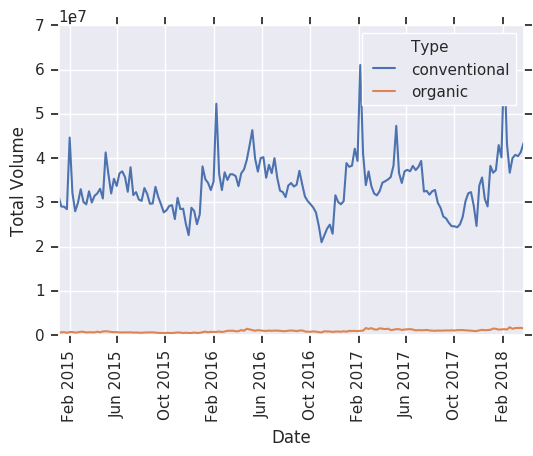

In [186]:
g = sns.lineplot(x="Date", y="Total Volume", hue="Type", data=df_TotalUS)
plt.xticks(rotation=90)

(array([ 735630.,  735750.,  735872.,  735995.,  736116.,  736238.,
         736361.,  736481.,  736603.,  736726.]),
 <a list of 10 Text xticklabel objects>)

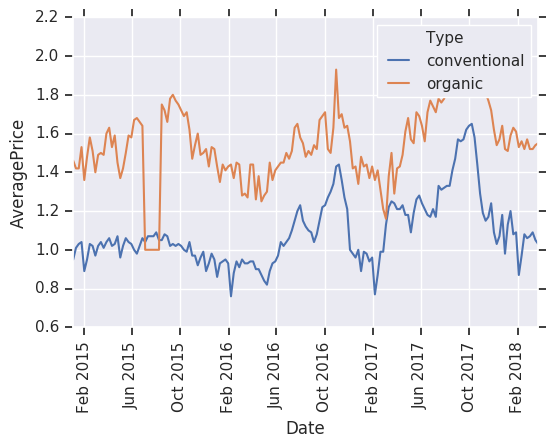

In [187]:
sns.lineplot(x="Date", y="AveragePrice", hue="Type", data=df_TotalUS)
plt.xticks(rotation=90)

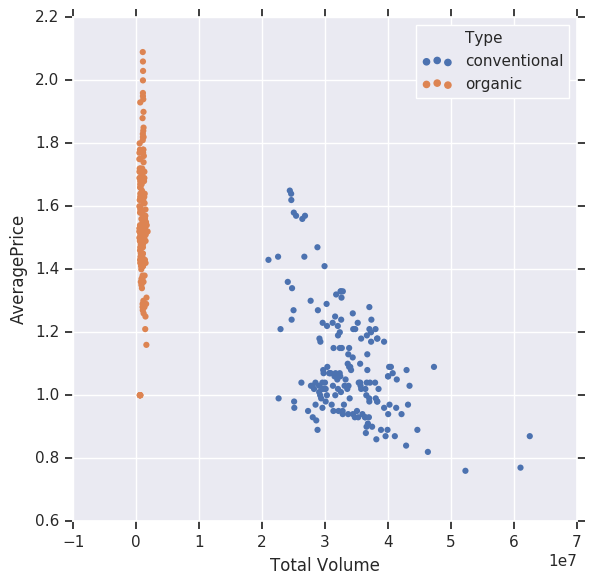

In [188]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="Total Volume", y="AveragePrice",
                hue="Type", 
                sizes=(1, 8), linewidth=0,
                data=df_TotalUS, ax=ax)

In [189]:
#pd.pivot_table(df[['AveragePrice','Total Volume','Year','Type']], index=['Type'])
#pd.crosstab(df['Year'], df['Type'], margins=True)
df_custom = pd.DataFrame(index =[0,1,2,3,4,5,6,7], columns = ['Year','Type', 'AveragePrice', 'Total Volume'])
df_custom

years = [2015,2016,2017,2018]
types = ['conventional', 'organic']

i = 0
for y in years:
    for t in types:
        avgPrice = df[(df['Year'] == y) & (df['Type'] == t)].loc[:,"AveragePrice"].mean()
        totVol = df[(df['Year'] == y) & (df['Type'] == t)].loc[:,'Total Volume'].mean()
        df_custom.loc[i] = [y, t, avgPrice, totVol]
        i = i + 1

display(df_custom)

,Year,Type,AveragePrice,Total Volume
0,2015,conventional,1.07796,1.53013e+06
1,2015,organic,1.67332,31659.9
2,2016,conventional,1.10559,1.67032e+06
3,2016,organic,1.57168,46524.2
4,2017,conventional,1.29489,1.66533e+06
5,2017,organic,1.73552,58790.2
6,2018,conventional,1.12789,2.05896e+06
7,2018,organic,1.56718,74895.5


In [192]:
#Adding mont column t data
df_TotalUS['month'] = df_TotalUS.apply(lambda x: x["Date"].month, axis=1)
df_TotalUS.head()

/home/grossedondon/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,AveragePrice,Date,Large Bags,Large Hass,Region,Small Bags,Small Hass,Total Bags,Total Volume,Type,XL Hass,XLarge Bags,Year,month
2652,0.95,2015-12-27 00:00:00+00:00,1252626.31,10197890.05,TotalUS,4850404.09,9626901.09,6288852.44,27297983.67,conventional,1184340.09,185822.04,2015,12
2653,0.98,2015-12-20 00:00:00+00:00,1025048.77,9329861.85,TotalUS,4618389.66,8710021.76,5842743.55,25083647.17,conventional,1201020.01,199305.12,2015,12
2654,0.93,2015-12-13 00:00:00+00:00,1371440.28,10805838.91,TotalUS,4964462.13,9855053.66,6364279.64,28041335.38,conventional,1016163.17,28377.23,2015,12
2655,0.89,2015-12-06 00:00:00+00:00,1233956.21,12160838.62,TotalUS,5005077.36,9405464.36,6302262.96,28800396.57,conventional,931830.63,63229.39,2015,12
2656,0.99,2015-11-29 00:00:00+00:00,856560.34,9003178.41,TotalUS,3901953.04,8094803.56,4789009.00,22617999.38,conventional,731008.41,30495.62,2015,11


In [193]:
df_custom_months = pd.DataFrame(index = pd.Series(range(0,88)), columns = ['Year','Month', 'Type', 'AveragePrice', 'Total Volume'])
#display(df_custom_months)

years = [2015,2016,2017,2018]
types = ['conventional', 'organic']
months = pd.Series(range(1,13))

def computeCustom(df,df_custom):
    i = 0
    for y in years:
        for m in months:
            for t in types:
                avgPrice = df[(df['Year'] == y) & (df['Type'] == t) & (df['month'] == m)].loc[:,"AveragePrice"].mean()
                totVol = df[(df['Year'] == y) & (df['Type'] == t) & (df['month'] == m)].loc[:,'Total Volume'].mean()
                df_custom.loc[i] = [y, m, t, avgPrice, totVol]
                i = i + 1

computeCustom(df_TotalUS,df_custom_months)
df_custom_months.head()

,Year,Month,Type,AveragePrice,Total Volume
0,2015,1,conventional,1.0075,2.94754e+07
1,2015,1,organic,1.4575,637982
2,2015,2,conventional,0.9725,3.36855e+07
3,2015,2,organic,1.4825,690349
4,2015,3,conventional,1.016,3.10314e+07


In [248]:
def colorYear(year):
    if (year == 2015):
        color = '#ccece6'
    elif (year == 2016):
        color = '#66c2a4'
    elif (year == 2017):
        color = '#238b45'
    else:
        color = '#005824'
    return color

def drawLines(df,linestyle,linewidth):
    for i in range(len(df)-1):
        x1 = df["Total Volume"][i]
        y1 = df["AveragePrice"][i]
        x2 = df["Total Volume"][i+1]
        y2 = df["AveragePrice"][i+1]
        c = colorYear(df["Year"][i])
        #print(df["Year"][i])
        plt.plot([x1, x2], [y1, y2], color=c, linestyle=linestyle, linewidth=linewidth)
        
def computeDraw(df_init, avocado_type, linestyle, linewidth):
    df = df_init[df_init['Type'] == avocado_type]
    df.reset_index(drop=True, inplace=True)
    drawLines(df,linestyle,linewidth)

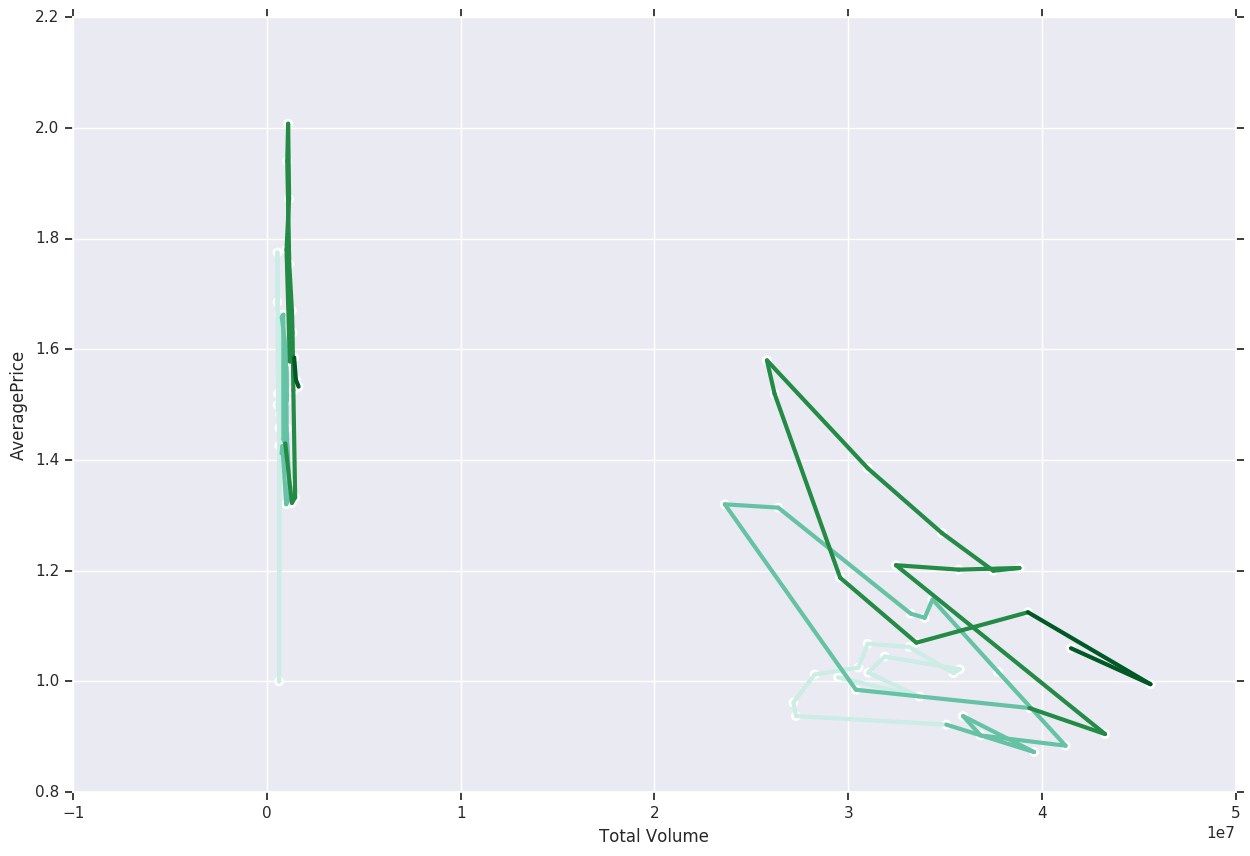

In [249]:
f, ax = plt.subplots(figsize=(15, 10))
#ax = sns.lineplot(x="Total Volume", y="AveragePrice", hue="Type", estimator=None, lw=1,data=df_custom_months, ax=ax)
sns.scatterplot(x="Total Volume", y="AveragePrice", color="w", size="Year", sizes=(50, 51), linewidth=0, data=df_custom_months, ax=ax)

computeDraw(df_custom_months, "organic", '-', 3)
computeDraw(df_custom_months, "conventional", '-', 3)

ax.get_legend().set_visible(False)

,Year,Month,Type,AveragePrice,Total Volume
0,2015,1,organic,1.4575,637982
1,2015,2,organic,1.4825,690349
2,2015,3,organic,1.496,720035
3,2015,4,organic,1.55,755002
4,2015,5,organic,1.492,793507
5,2015,6,organic,1.6625,646172
6,2015,7,organic,1,627073
7,2015,8,organic,1.426,636021
8,2015,9,organic,1.775,540728
9,2015,10,organic,1.685,539038


(array([  400000.,   600000.,   800000.,  1000000.,  1200000.,  1400000.,
         1600000.,  1800000.]), <a list of 8 Text xticklabel objects>)

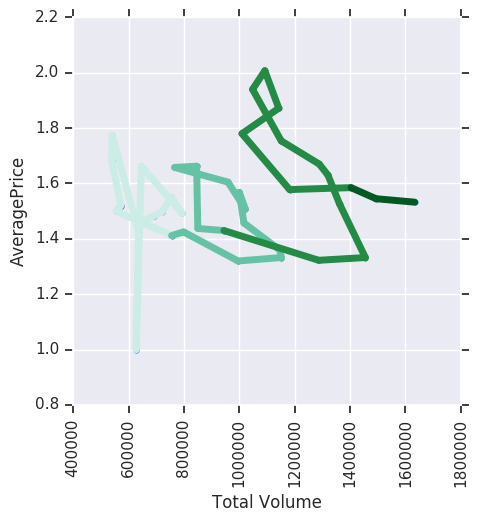

In [250]:
df_organic = df_custom_months[df_custom_months['Type'] == "organic"]
f, ax = plt.subplots(figsize=(5, 5)) 
sns.scatterplot(x="Total Volume", y="AveragePrice", sizes=(1, 8), linewidth=0,data=df_organic, ax = ax)

df_organic.reset_index(drop=True, inplace=True)
display(df_organic)

drawLines(df_organic,'-',5)
plt.xticks(rotation=90)

,Year,Month,Type,AveragePrice,Total Volume
0,2015,1,conventional,1.0075,2.94754e+07
1,2015,2,conventional,0.9725,3.36855e+07
2,2015,3,conventional,1.016,3.10314e+07
3,2015,4,conventional,1.045,3.18831e+07
4,2015,5,conventional,1.022,3.57569e+07
5,2015,6,conventional,1.015,3.54299e+07
6,2015,7,conventional,1.0625,3.31451e+07
7,2015,8,conventional,1.068,3.10023e+07
8,2015,9,conventional,1.025,3.05237e+07
9,2015,10,conventional,1.0125,2.82687e+07


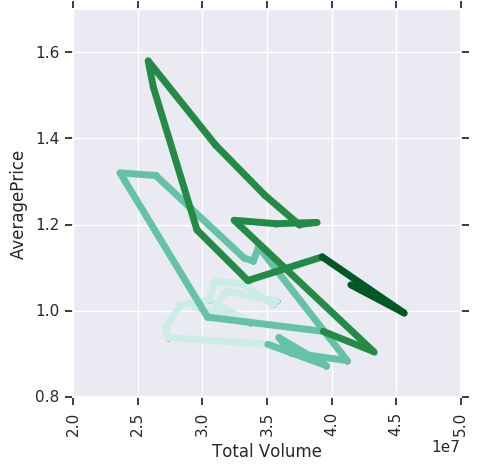

In [251]:
df_conventional = df_custom_months[df_custom_months['Type'] == "conventional"]
df_conventional.reset_index(drop=True, inplace=True)

f, ax = plt.subplots(figsize=(5, 5)) 
sns.scatterplot(x="Total Volume", y="AveragePrice", sizes=(1, 8), linewidth=0,data=df_conventional, ax=ax)
drawLines(df_conventional,'-',5)
plt.xticks(rotation=90)
display(df_conventional)

In [ ]:
######
## Test & Trials
######

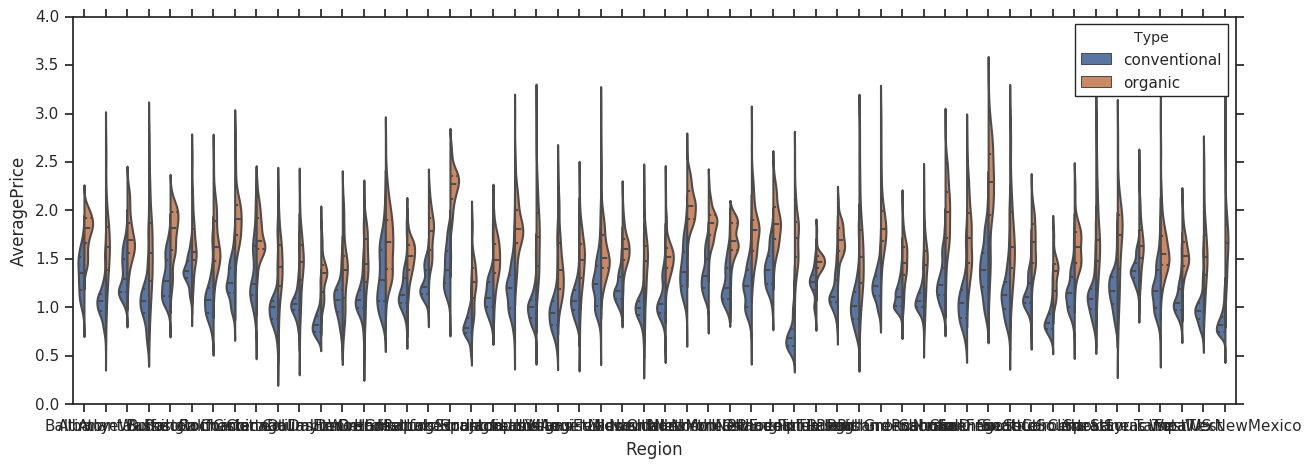

In [57]:
fig, ax = plt.subplots(figsize=(15,5))
sns.violinplot(x="Region", y="AveragePrice", hue="Type",
               split=True, inner="quart",
               data=df)

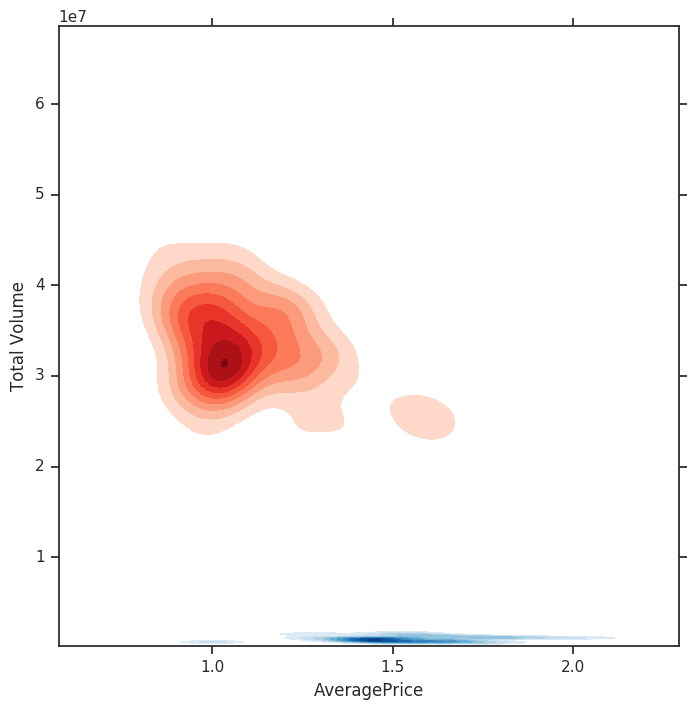

In [53]:
#sns.jointplot(x=df_TotalUS["AveragePrice"], y=df_TotalUS["Total Volume"], kind="hex", color="#4CB391")
df_TotalUS_conventional = df_TotalUS[df_TotalUS['Type'] == "conventional"]
df_TotalUS_organic = df_TotalUS[df_TotalUS['Type'] == "organic"]

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
#ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(df_TotalUS_conventional["AveragePrice"], df_TotalUS_conventional["Total Volume"],
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(df_TotalUS_organic["AveragePrice"], df_TotalUS_organic["Total Volume"],
                 cmap="Blues", shade=True, shade_lowest=False)

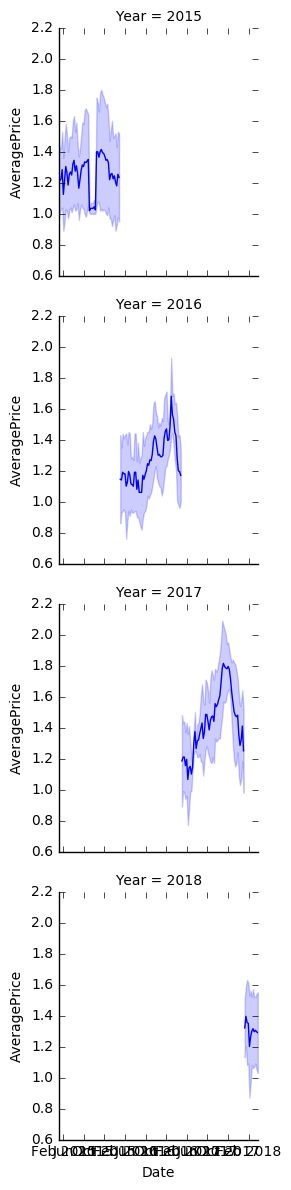

In [26]:

#sns.lineplot(x="Date", y="AveragePrice", hue="Type", col="Year", data=df_TotalUS)
#g = sns.FacetGrid(df_TotalUS, col="Year", col_wrap=4, height=2, ylim=(0, 10))
g = sns.FacetGrid(df_TotalUS, row="Year")
g.map(sns.lineplot, "Date", "AveragePrice");